In [1]:
import base64
import datetime
import json
import os
import random
import time

import scipy
from scipy import ndimage
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from pylab import *
from matplotlib.dates import date2num , DateFormatter
from PIL import Image

np.random.seed(1337)

%matplotlib inline
sns.set(font_scale=1.0)
rcParams['figure.figsize'] = 8, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from sklearn.cluster import *

# Load the Data

In [3]:
d = pd.read_json('tmp/raw_data.json')
d.index.name = 'id'
d = d[['latitude', 'longitude', 'bedrooms', 'price']]
print len(d)

124011


In [4]:
d.dtypes

latitude     float64
longitude    float64
bedrooms       int64
price          int64
dtype: object

# Try Different Clustering Algos

In [5]:
colors = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'm',
    4: 'y',
    5: 'c',
    6: 'k'
}

### K-Means

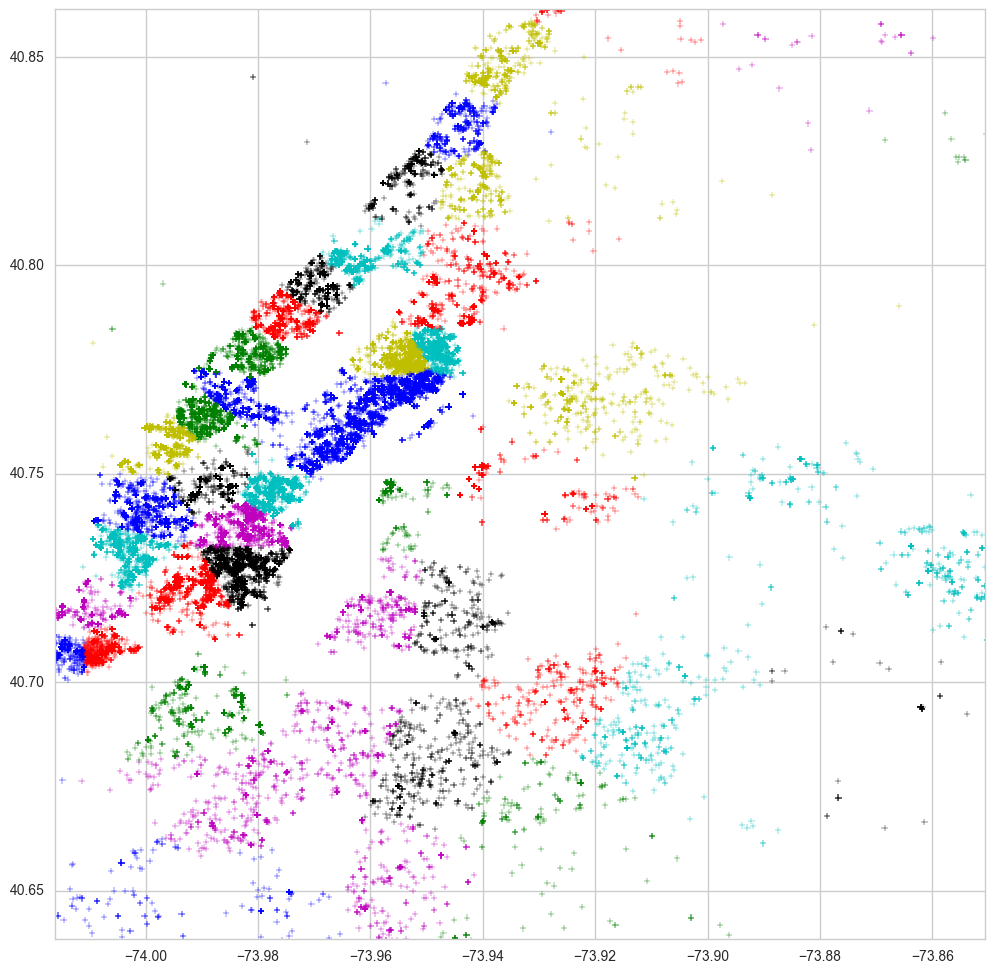

In [6]:
e = d.sample(50000)
clustering = sklearn.cluster.KMeans(n_clusters=80)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Affinity Propagationm

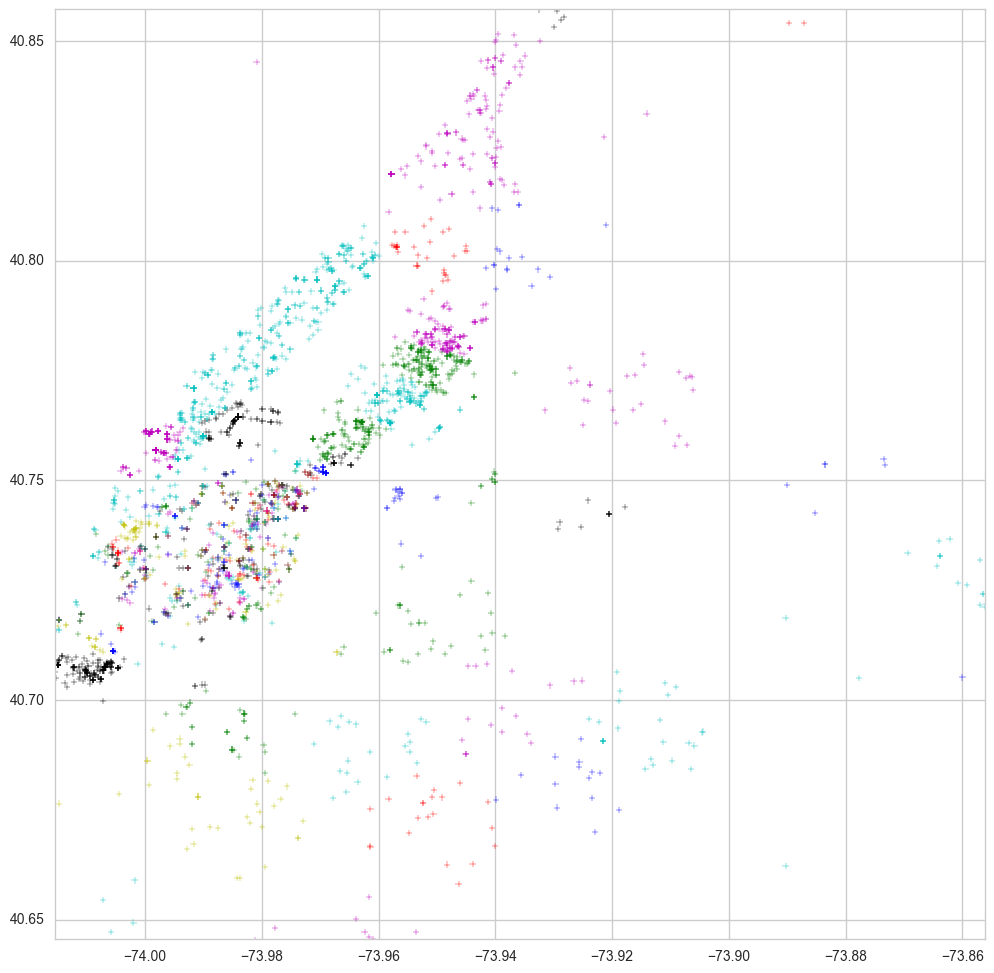

In [7]:
e = d.sample(3000)
clustering = sklearn.cluster.AffinityPropagation(damping=0.5)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Mean-Shift

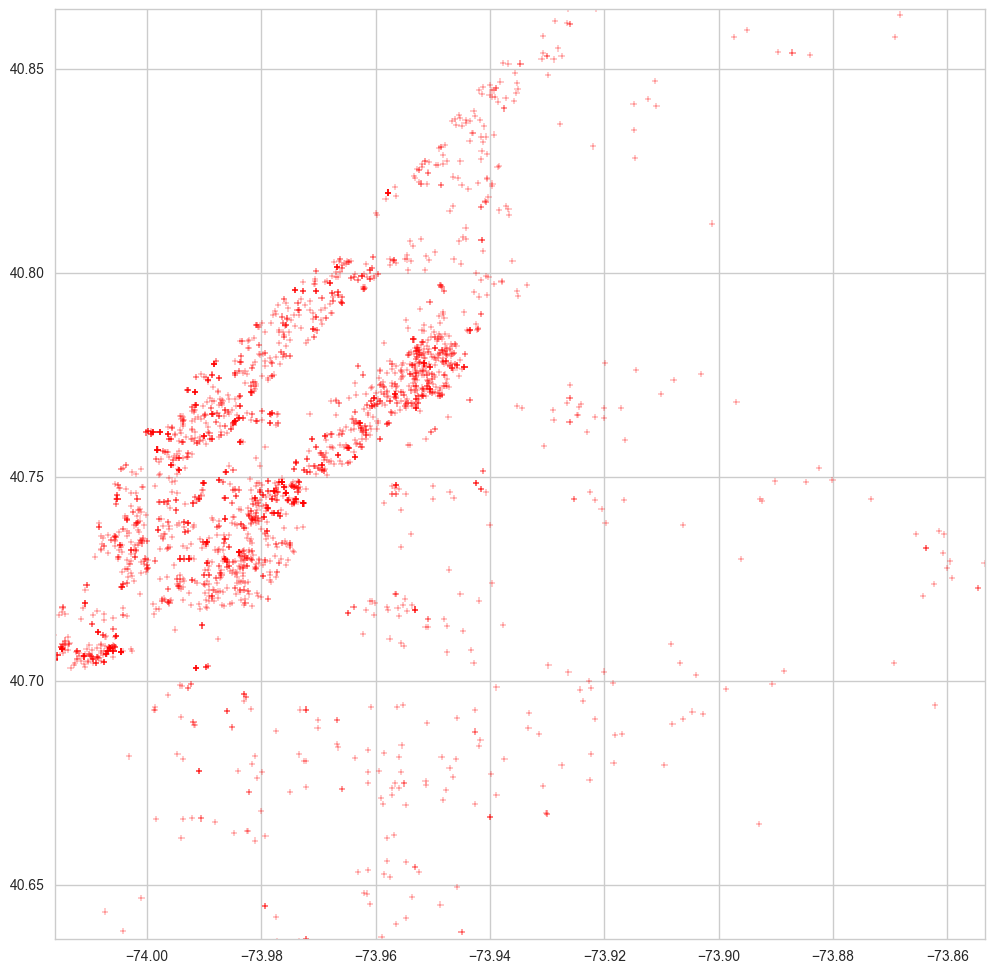

In [8]:
e = d.sample(3000)
clustering = sklearn.cluster.MeanShift()
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Spectral Clustering

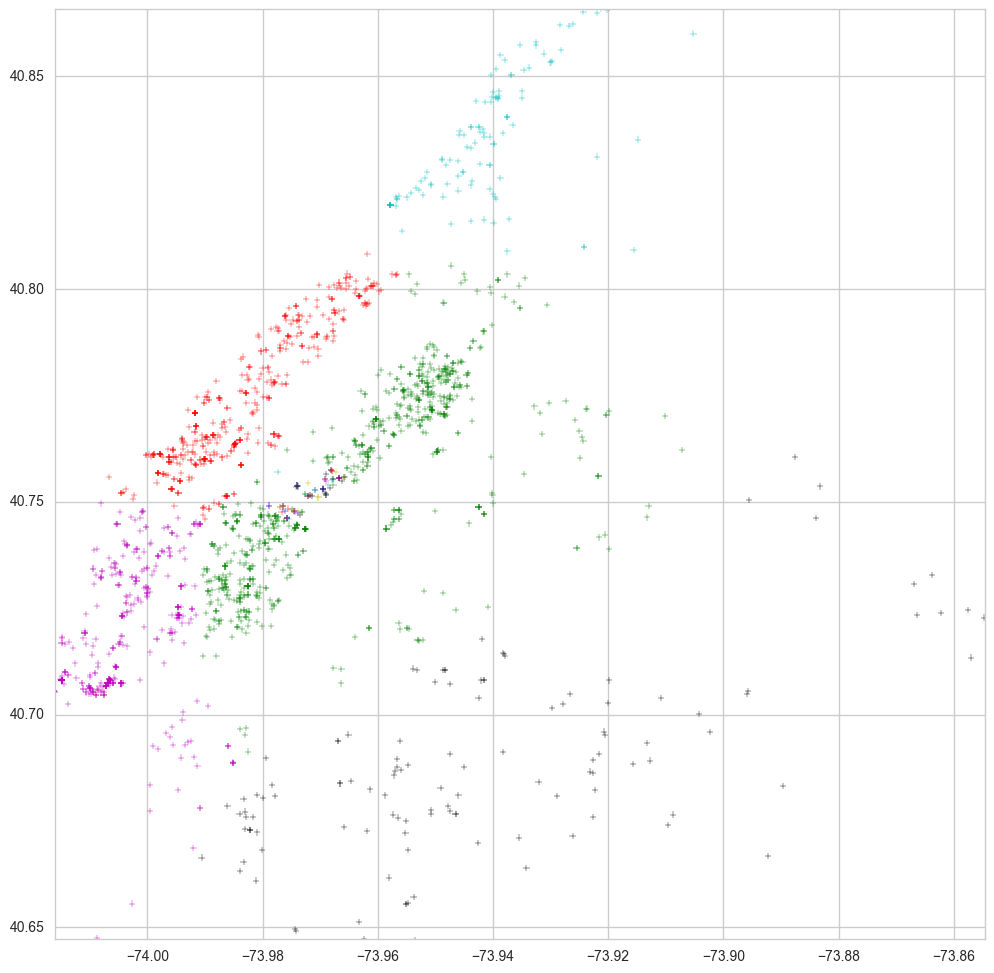

In [9]:
e = d.sample(2000)
clustering = sklearn.cluster.SpectralClustering(n_clusters=100)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Agglomerative Clustering

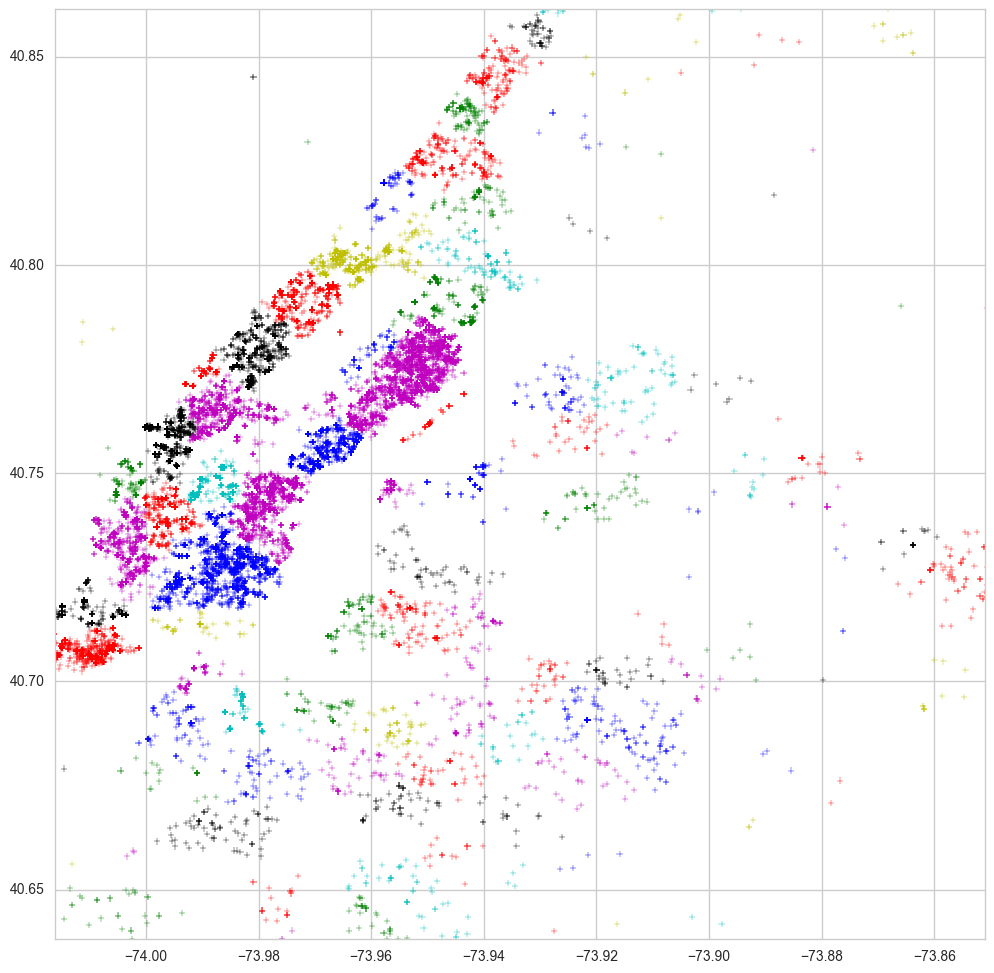

In [10]:
e = d.sample(20000)
clustering = sklearn.cluster.AgglomerativeClustering(linkage='average', n_clusters=200)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### DBSCAN

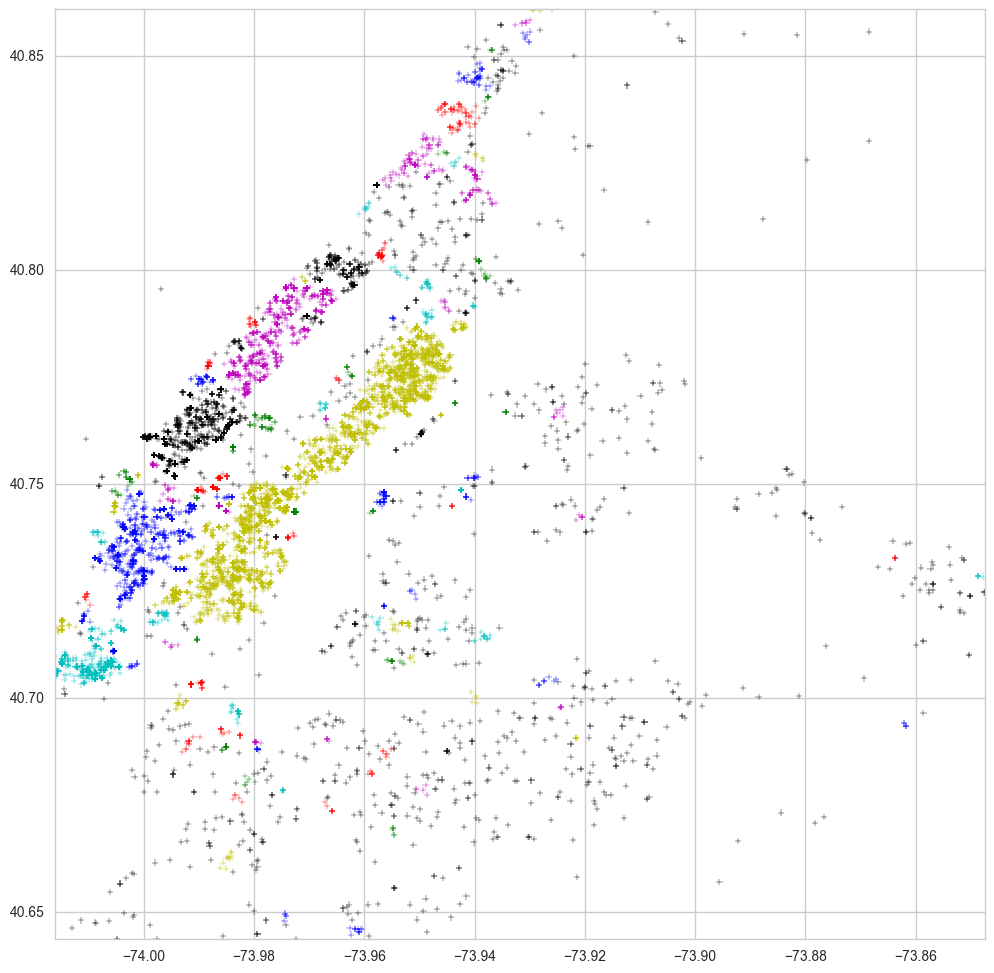

In [11]:
e = d.sample(10000)
clustering = sklearn.cluster.DBSCAN(eps=0.0015, n_jobs=4)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Birch

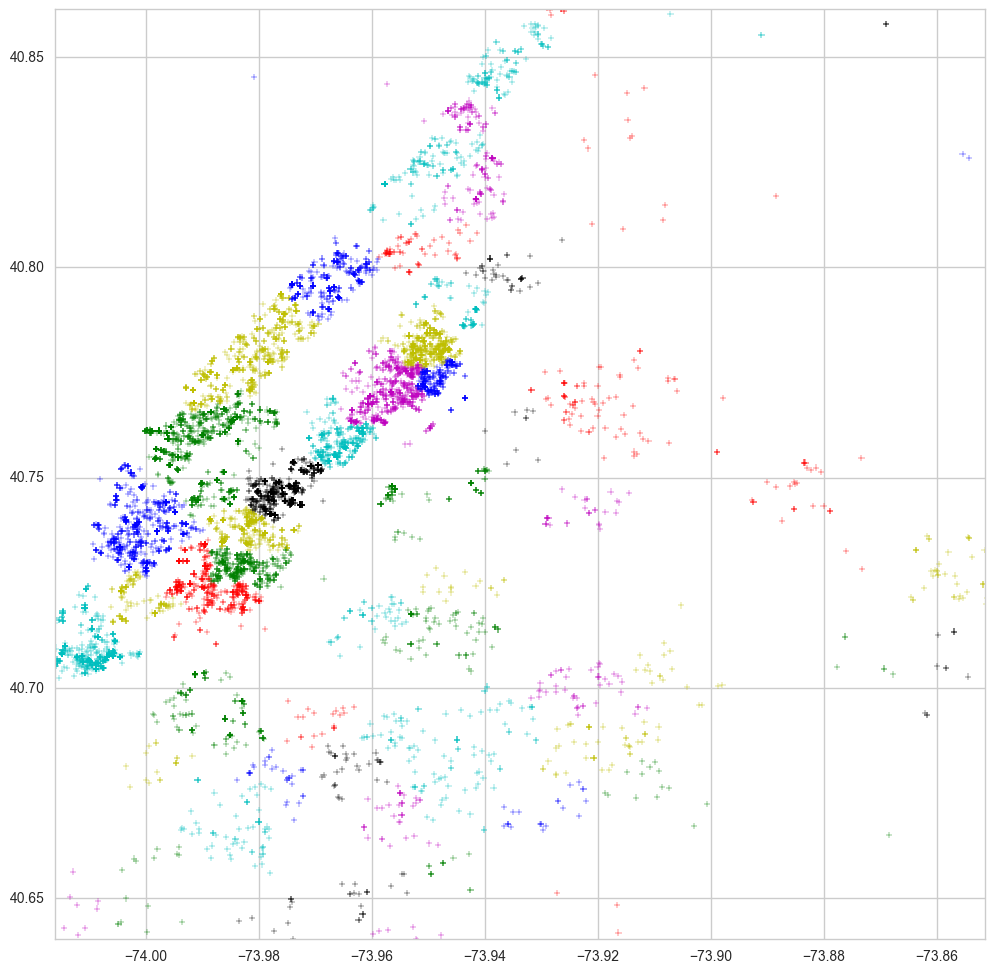

In [12]:
e = d.sample(10000)
clustering = sklearn.cluster.Birch(threshold=0.001, n_clusters=100)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

# K-Means Clustering

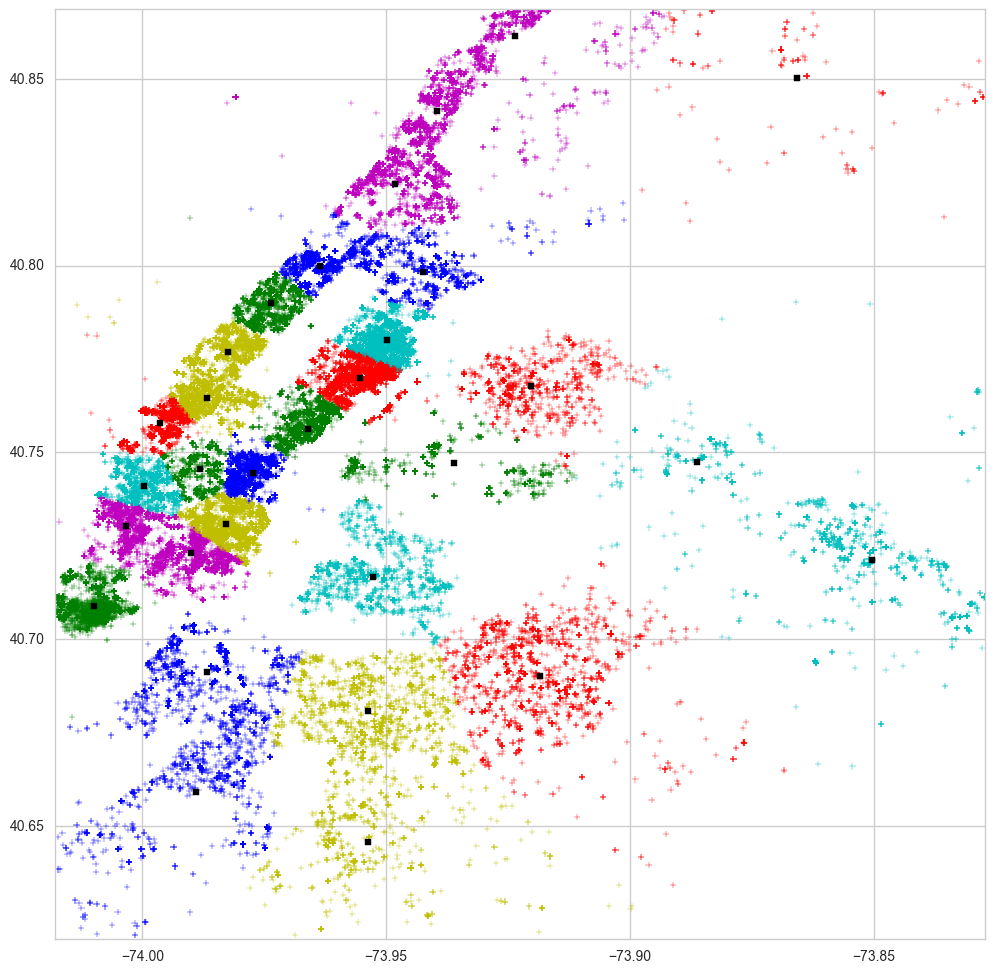

In [13]:
lon_q1 = d.longitude.quantile(0.005)
lon_q99 = d.longitude.quantile(0.995)
lat_q1 = d.latitude.quantile(0.005)
lat_q99 = d.latitude.quantile(0.995)
e = d[((d.longitude >= lon_q1) &
       (d.longitude <= lon_q99) &
       (d.latitude >= lat_q1) &
       (d.latitude <= lat_q99))]#.sample(50000)
clustering = sklearn.cluster.KMeans(n_clusters=30)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%6)] for i in clustering.labels_],
    marker='+')
plt.scatter(
    x=clustering.cluster_centers_[:,0],
    y=clustering.cluster_centers_[:,1],
    c='k',
    marker=',')
_ = plt.xlim((lon_q1, lon_q99))
_ = plt.ylim((lat_q1, lat_q99))

In [14]:
d['cluster_id'] = 30
d.loc[((d.longitude >= lon_q1) &
       (d.longitude <= lon_q99) &
       (d.latitude >= lat_q1) &
       (d.latitude <= lat_q99)), 'cluster_id'] = clustering.labels_

# Cluster Size

In [15]:
d['cluster_size'] = np.nan
for cid in d.cluster_id.unique():
    d.loc[d.cluster_id == cid, 'cluster_size'] = len(d[d.cluster_id == cid])

# Distance from Centroid

In [16]:
centroids = pd.DataFrame(clustering.cluster_centers_)
centroids = pd.concat([centroids,pd.DataFrame({0: [-73.95], 1: [40.75]}, index=[30])])
dc = pd.merge(d, centroids, left_on='cluster_id', right_index=True)
d['distance_from_centroid'] = np.power(
    (np.power((dc.longitude - dc[0]), 2.0) +
    np.power((dc.latitude - dc[1]), 2.0)),
    0.5)

# Price Quantile

In [17]:
d['price_cluster_q_10'] = np.nan
for cid in d.cluster_id.unique():
    noise = np.random.randn(len(d[d.cluster_id == cid]))
    d.loc[(d.cluster_id == cid), 'price_cluster_q_10'] = \
                pd.qcut((d.loc[d.cluster_id == cid, 'price'] + 0.1*noise),
                        10,
                        [0.1 * i for i in range(0, 10)])

In [18]:
d['price_cluster_q_10_bedrooms'] = np.nan
for cid in d.cluster_id.unique():
    for b in d[d.cluster_id == cid].bedrooms.value_counts().index:
        noise = np.random.randn(len(d[((d.bedrooms == b) & (d.cluster_id == cid))]))
        try:
            d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price_cluster_q_10_bedrooms'] = \
                pd.qcut((d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price'] + 0.1*noise),
                        10,
                        [0.1 * i for i in range(0, 10)])
        except:
            d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price_cluster_q_10_bedrooms'] = 0.5

# Nearest Neighbours

In [19]:
# ...

# Save the Data

In [20]:
del d['latitude']
del d['longitude']
del d['bedrooms']
del d['price']

In [21]:
d.to_csv('tmp/features_latlon.csv')